In [8]:

import numpy as np
import pandas as pd
import os
import PIL # install pillow - pip install Pillow
import PIL.Image
import tensorflow as tf
#from tensorflow import keras
import tensorflow_datasets as tfds # need to install this seperately - pip install tensorflow_datasets
import pathlib
from skimage import io
import datetime
import matplotlib.pyplot as plt
import h5py # pip install h5py
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.gridspec as gridspec
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import glob
import os
import shutil
import socket

# copy .csv files from one location to other
# use only once when you need to add new class

In [9]:
# copy .csv files from one location to other
#use only once when you need to add new class


# src_folder = r"C:\Users\ajitj\OneDrive - Universitetet i Agder\PhD_Research\Paper_Writing\Textile Sorting\Data_textile_NIRSCAN\ML_textile_classification_timeseries\Data_NIRSCAN_CSV\polyester-000011\polyester-000011"
# dst_folder = r"C:\Users\ajitj\OneDrive - Universitetet i Agder\PhD_Research\Paper_Writing\Textile Sorting\Data_textile_NIRSCAN\ML_textile_classification_timeseries\data_ml\polyester"

# # Search files with .txt extension in source directory
# pattern = "\*.csv"
# files = glob.glob(src_folder + pattern)

# # move the files with txt extension
# for file in files:
#     # extract file name form file path
#     file_name = os.path.basename(file)
#     shutil.move(file, dst_folder + file_name)
#     #print('Moved:', file)

# Use this to generate .csv file for ml. Use only once to generate data_cotton_wool_polyester.csv

In [10]:
import pandas as pd
import numpy as np
import glob

# Function to read and process data
def read_data(path):
    appended_data = []
    df = [pd.read_csv(filename, header=21) for filename in glob.glob(path)] 
    peak_abs = np.zeros((np.shape(df)[0]))
    for file in range(np.shape(df)[0]):
        df[file]['wavelength'] = pd.to_numeric(df[file]['Wavelength (nm)'], errors='coerce')
        df[file]['absorbance'] = pd.to_numeric(df[file]['Absorbance (AU)'], errors='coerce')
        df[file]['absorbance'] = df[file]['absorbance'] / np.max(df[file]['absorbance'])
        df[file] = df[file].drop(['wavelength', 'Absorbance (AU)', 'Reference Signal (unitless)', 
                                  'Sample Signal (unitless)', 'Wavelength (nm)'], axis=1)
        appended_data.append(df[file].T)  # Transpose for row-wise appending
    if appended_data:  # Check if appended_data is not empty
        appended_data = pd.concat(appended_data)  # Combine all files into one DataFrame
    else:
        appended_data = pd.DataFrame()  # Return an empty DataFrame if no data
    return appended_data, peak_abs

# Cotton
path_cotton = r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\cotton\**\*.csv'
appended_data_cotton, peak_abs_cotton = read_data(path_cotton)
if not appended_data_cotton.empty:
    class_cotton = np.zeros(len(appended_data_cotton)).astype(int)  # Class 0
    appended_data_cotton.insert(np.shape(appended_data_cotton)[1], "class", class_cotton)
    print(f"Cotton data loaded: {len(appended_data_cotton)} samples.")

# Wool
path_wool = r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\wool\**\*.csv'
appended_data_wool, peak_abs_wool = read_data(path_wool)
if not appended_data_wool.empty:
    class_wool = np.ones(len(appended_data_wool)).astype(int)  # Class 1
    appended_data_wool.insert(np.shape(appended_data_wool)[1], "class", class_wool)
    print(f"Wool data loaded: {len(appended_data_wool)} samples.")

# Polyester
path_polyester = r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\polyester\**\*.csv'
appended_data_polyester, peak_abs_polyester = read_data(path_polyester)
if not appended_data_polyester.empty:
    class_polyester = np.ones(len(appended_data_polyester)).astype(int) * 2  # Class 2
    appended_data_polyester.insert(np.shape(appended_data_polyester)[1], "class", class_polyester)
    print(f"Polyester data loaded: {len(appended_data_polyester)} samples.")

# Unknown
path_unknown = r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\unknown\*.csv'
print(f"Searching for unknown class files in: {path_unknown}")
appended_data_unknown, peak_abs_unknown = read_data(path_unknown)
if not appended_data_unknown.empty:
    class_unknown = np.ones(len(appended_data_unknown)).astype(int) * 3  # Class 3
    appended_data_unknown.insert(np.shape(appended_data_unknown)[1], "class", class_unknown)
    print(f"Unknown data loaded: {len(appended_data_unknown)} samples.")
else:
    print("No data found for the 'unknown' class.")

# Concatenate all data
data = [appended_data_cotton, appended_data_wool, appended_data_polyester, appended_data_unknown]
data = [df for df in data if not df.empty]  # Filter out empty dataframes
if data:
    data = pd.concat(data)
else:
    data = pd.DataFrame()  # Return an empty DataFrame if no data

# Save to CSV
output_path = r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\data_cotton_wool_polyester_unknown.csv'
data.to_csv(output_path, index=False)

# Verify
print("Data Head: \n", data.head())
print("Data Tail: \n", data.tail())
print("Class Counts: \n", data['class'].value_counts())


Cotton data loaded: 1000 samples.
Wool data loaded: 1000 samples.
Polyester data loaded: 1000 samples.
Searching for unknown class files in: C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\unknown\*.csv
Unknown data loaded: 1000 samples.
Data Head: 
                    0         1         2         3         4         5  \
absorbance -0.032214 -0.007049 -0.001102 -0.000654 -0.008188 -0.012234   
absorbance -0.031801  0.001236  0.007400  0.005055 -0.003947 -0.004986   
absorbance -0.025959  0.004670  0.002298  0.011410  0.001458 -0.006218   
absorbance -0.026155  0.001027  0.006856  0.003588 -0.004479 -0.009514   
absorbance -0.034190 -0.003693 -0.006235 -0.003916 -0.014561 -0.015821   

                   6         7         8         9  ...       219       220  \
absorbance -0.023874 -0.011937 -0.007605 -0.002166  ...  0.395435  0.395343   
absorbance -0.012545 -0.009262 -0.003596 -0.001151  ...  0.384945  0.385709   
absorbance

# Use this code to load data_cotton_wool_polyester.csv

In [11]:
data = pd.read_csv(r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\data_cotton_wool_polyester.csv')
#read cotton file, to extract wavelength value. This is same for all acq
path_c=r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\cotton\**\*.csv' # path of file to read
files = glob.glob(path_c)
data_c = pd.concat([pd.read_csv(file, header=21) for file in files], ignore_index=True)
wavelength = data_c['Wavelength (nm)']
wavelength = np.around(wavelength) #truncate to 1 dec place
wavelength = wavelength.to_numpy()


In [12]:
wavelength[-1]

1701.0

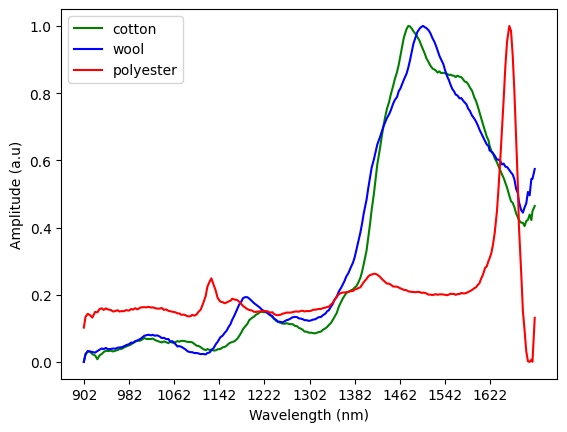

In [13]:

cotton_portion=data[0:int(np.shape(data)[0]/3)] #900x229; 900 data samples (acq), 0:227 data, 228 label data frame; data --1800x229
wool_portion=data[int(np.shape(data)[0]/3):2*int(np.shape(data)[0]/3)]
polyester_portion=data[2*int(np.shape(data)[0]/3)::]

#normalize spectral data
cp=cotton_portion.iloc[0][0:228]
wp=wool_portion.iloc[0][0:228]
pp=polyester_portion.iloc[0][0:228]

cp_n=(cp-np.min(cp))/(np.max(cp)-np.min(cp))
wp_n=(wp-np.min(wp))/(np.max(wp)-np.min(wp))
pp_n=(pp-np.min(pp))/(np.max(pp)-np.min(pp))

plt.figure(1)
#plt.title('Data')
plt.plot(wavelength[:228], cp_n, 'g', label='cotton') #cotton_portion.iloc[0][0:228]
plt.plot(wavelength[:228], wp_n, 'b', label='wool')
plt.plot(wavelength[:228], pp_n, 'r', label='polyester')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Amplitude (a.u)')
# Change x-axis tick spacing
plt.xticks(np.arange(wavelength[0], wavelength[227], step=80))  # ticks at 0, 2, 4, ..., 10
plt.legend()
plt.show()


In [14]:
cp=cotton_portion.iloc[0][0:228]
cp_n=(cp-np.mean(cp))/np.std(cp)
cp_n

0     -1.038446
1     -0.965672
2     -0.948475
3     -0.947178
4     -0.968968
         ...   
223    0.224516
224    0.270548
225    0.221626
226    0.300617
227    0.346696
Name: 0, Length: 228, dtype: float64

In [15]:
# def read_data(path):
#     appended_data = []
#     df = [pd.read_csv(filename,header=21) for filename in glob.glob(path)] 
#     peak_abs=np.zeros((np.shape(df)[0]))
#     for file in range(np.shape(df)[0]):
#         #df[file][['wavelength','absorbance', 'reference', 'sample_signal']]=df[file]['data'].str.split(expand=True)
#         df[file]['wavelength'] = pd.to_numeric(df[file]['Wavelength (nm)'], errors='coerce')
#         df[file]['absorbance'] = pd.to_numeric(df[file]['Absorbance (AU)'], errors='coerce')
#         df[file]['absorbance']=df[file]['absorbance']/np.max(df[file]['absorbance'])
#          # remove data col, as not needed
#         df[file]=df[file].drop(['Absorbance (AU)', 'Reference Signal (unitless)', 'Sample Signal (unitless)', 'Wavelength (nm)'], axis=1)
#         appended_data.append(df[file])
#         peak_abs[file]=df[file]['wavelength'][np.argmax(df[file]['absorbance'])]
#     appended_data = pd.concat(appended_data) # all 900 acquisition appended together
#     #appended_data_coton.to_excel('appended.xlsx') # write to csv    
#     return df, appended_data, peak_abs



# def read_data(path):
#     append_files=[]
#     for file in range(np.shape(df_cotton)[0]):
#         df_cotton[file] = pd.DataFrame(df_cotton[file])
#         #df_cotton[file]=df_cotton[file].drop(['wavelength'], axis=1)
#         append_files_cotton.append(df_cotton[file].T) #228x1
#     append_files_cotton = pd.concat(append_files_cotton) # all 900 acquisition appended together
#     append_files_cotton.to_csv('df_cotton.csv', index=False)




# path_cotton=r'C:\Users\ajitj\OneDrive - Universitetet i Agder\PhD_Research\Paper_Writing\Textile Sorting\Data_textile_NIRSCAN\ML_textile_classification_timeseries\train\cotton\*.csv' # path of file to read
# df_cotton, appended_data_cotton, peak_abs_cotton =read_data(path_cotton) # read file 1000x227x4
# class_cotton=np.zeros(len(appended_data_cotton)).astype(int)
# appended_data_cotton.insert(2, "class", class_cotton)

In [16]:
# np.shape(df_cotton), np.shape(appended_data_cotton), 

# append_files_cotton=[]
# #convert df_cotton from list to pd dataframe, save it as csv
# for file in range(np.shape(df_cotton)[0]):
#     df_cotton[file] = pd.DataFrame(df_cotton[file])
#     #df_cotton[file]=df_cotton[file].drop(['wavelength'], axis=1)
#     append_files_cotton.append(df_cotton[file].T) #228x1
# append_files_cotton = pd.concat(append_files_cotton) # all 900 acquisition appended together
# append_files_cotton.to_csv('df_cotton.csv', index=False)

 # Use this to read csv files and do ml. Use this ONLY when the data is  saved as .csv

In [17]:
#use this to read csv files and onwards
data = pd.read_csv(r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\data_cotton_wool_polyester.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,class
0,-0.032214,-0.007049,-0.001102,-0.000654,-0.008188,-0.012234,-0.023874,-0.011937,-0.007605,-0.002166,...,0.395435,0.395343,0.384994,0.400474,0.404514,0.420432,0.403515,0.430830,0.446764,0
1,-0.031801,0.001236,0.007400,0.005055,-0.003947,-0.004986,-0.012545,-0.009262,-0.003596,-0.001151,...,0.384945,0.385709,0.380950,0.395877,0.394159,0.409218,0.390902,0.420893,0.425142,0
2,-0.025959,0.004670,0.002298,0.011410,0.001458,-0.006218,-0.008979,-0.002654,0.001702,0.003085,...,0.383040,0.376949,0.388710,0.399407,0.385891,0.400833,0.430223,0.404323,0.440580,0
3,-0.026155,0.001027,0.006856,0.003588,-0.004479,-0.009514,-0.013432,-0.008909,0.001362,-0.001913,...,0.398348,0.387466,0.376672,0.386040,0.408835,0.383884,0.410115,0.420786,0.421234,0
4,-0.034190,-0.003693,-0.006235,-0.003916,-0.014561,-0.015821,-0.016435,-0.017141,-0.007870,-0.003992,...,0.379072,0.376525,0.377253,0.395654,0.380191,0.374733,0.390266,0.373641,0.417048,0


In [18]:
# train test data set

# train_df, val_df = train_test_split(data, test_size=0.20)
# train_df, test_df = train_test_split(train_df, test_size=0.1)

# #training, val and test data size
# print ("Train shape: {} \n Val shape: {} \n Test shape: {} \n" .format(np.shape(train_df), np.shape(val_df), np.shape(test_df))) 
# #np.array( [np.shape(train_df)[0], np.shape(val_df)[0], np.shape(val_df)[0] ]) /np.array([np.shape(data)[0]])
# # train, val, test - 70, 20, 10

# #save to csv
# #data.to_csv('data_cotton_wool.csv', index=False)  

# #check
# data['class'].value_counts()

In [19]:
# train, test and split 

y = data['class']
x = data.drop(columns=['class'])
#x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=40)


print("Train: \n {}\n".format(y_train.value_counts()))
print("Val: \n {} \n".format(y_val.value_counts()))
print("Test: \n {} \n".format(y_test.value_counts()))

print("Train: \n {} {}\n".format(np.shape(x_train), np.shape(y_train)))
print("Val: \n {} {}\n".format(np.shape(x_val), np.shape(y_val)))
print("Test: \n {} {}\n".format(np.shape(x_test), np.shape(y_test)))

# Train: (1440, 228) (1440,)

#Val: (360, 228) (360,)


Train: 
 class
2    730
1    720
0    710
Name: count, dtype: int64

Val: 
 class
0    217
1    197
2    186
Name: count, dtype: int64 

Test: 
 class
2    84
1    83
0    73
Name: count, dtype: int64 

Train: 
 (2160, 228) (2160,)

Val: 
 (600, 228) (600,)

Test: 
 (240, 228) (240,)



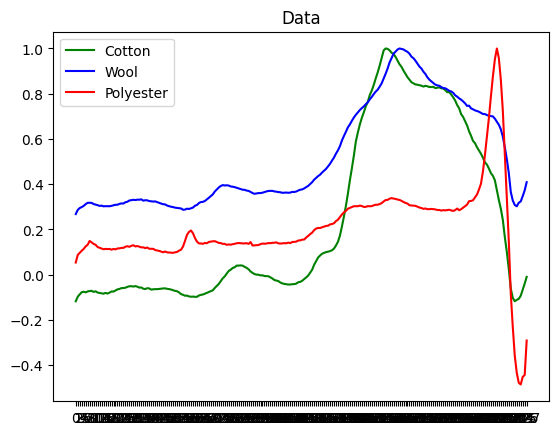

In [ ]:
# Debug: Check unique labels and counts
print("Unique labels in y_train:", np.unique(y_train))
print("Count of samples for each label in y_train:")
print({label: np.sum(y_train == label) for label in np.unique(y_train)})

# Find where the labels are 0 (cotton), 1 (wool), 2 (polyester), and 3 (unknown) in training data
y_train_0 = np.argwhere(y_train == 0)  # Cotton
y_train_1 = np.argwhere(y_train == 1)  # Wool
y_train_2 = np.argwhere(y_train == 2)  # Polyester
y_train_3 = np.argwhere(y_train == 3)  # Unknown

# Debug: Check if unknown class exists
if len(y_train_3) > 0:
    print("Indices of unknown samples in y_train:", y_train_3.flatten())
else:
    print("No unknown class samples found in y_train.")

# Plot a few samples
plt.figure(1)
plt.title('Data')

# Cotton
plt.plot(x_train.iloc[y_train_0[0, 0]], 'g', label='Cotton')

# Wool
plt.plot(x_train.iloc[y_train_1[0, 0]], 'b', label='Wool')

# Polyester
plt.plot(x_train.iloc[y_train_2[0, 0]], 'r', label='Polyester')

# Unknown
if len(y_train_3) > 0:  # Check if unknown data exists
    plt.plot(x_train.iloc[y_train_3[0, 0]], 'm', label='Unknown')

plt.legend()
plt.show()


In [21]:
METRICS = [
      tf.keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      tf.keras.metrics.MeanSquaredError(name='Brier score'),
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS):
  
  # model1 = tf.keras.Sequential([
  #     tf.keras.layers.Dense(
  #         16, activation='relu',
  #         input_shape=(x_train.shape[-1],)),
  #     tf.keras.layers.Dropout(0.5),
  #     tf.keras.layers.Dense(1, activation='sigmoid'),
  # ])

  model=tf.keras.Sequential([
    
  #tf.keras.layers.experimental.preprocessing.Rescaling(scale=1 / 127.5, input_shape=(n_row, n_col, 3), offset=-1),
  #tf.keras.layers.Dense(228, activation='relu',input_shape=(x_train.shape[-1],)),
  tf.keras.layers.Conv1D(8, kernel_size=8, input_shape=(x_train.shape[-1],1), strides=1,  activation='relu'),  
  tf.keras.layers.MaxPooling1D(pool_size=2),
  tf.keras.layers.Conv1D(16, 8, padding="same", activation="relu"),
  tf.keras.layers.MaxPooling1D(pool_size=2),
  
  #tf.keras.layers.Conv1D(32, 8, padding="same", activation="relu"),  !!!!!!
  
  #tf.keras.layers.Conv1D(64, 3, padding="same", activation="relu"),
  #tf.keras.layers.MaxPooling1D(pool_size=2),
  #tf.keras.layers.Conv1D(64, 3, padding="same", activation="relu"),
  #tf.keras.layers.MaxPooling1D(pool_size=2),

  #tf.keras.layers.Conv1D(64, 3, activity_regularizer=tf.keras.regularizers.L2(0.01),padding="same", activation="relu"),
  tf.keras.layers.MaxPooling1D(pool_size=2),

  tf.keras.layers.Flatten(),

  # tf.keras.layers.Dense(64, 
  # activity_regularizer=tf.keras.regularizers.L2(0.01),
  # activation='relu'),

  tf.keras.layers.Dense(
     32, 
      activity_regularizer=tf.keras.regularizers.L2(0.01),
      activation='relu'),
  tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Dense(1, activation='sigmoid'),
  tf.keras.layers.Dense(3, activation='softmax'),
    ])

  model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss=tf.keras.losses.BinaryCrossentropy(),
        #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # use false when we have softmax at last layer
        metrics=metrics)

  return model

EPOCHS = 100 #50
BATCH_SIZE = 32

# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_prc', 
#     verbose=1,
#     patience=10,
#     mode='max',
#     restore_best_weights=True)

model = make_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 221, 8)            72        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 110, 8)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 110, 16)           1040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 55, 16)           0         
 1D)                                                             
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 27, 16)           0         
 1D)                                                             
                                                        

In [22]:
import tempfile
import datetime
import os
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define the model save path
log_path = r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\scripts\model'

# Generate a timestamp for model naming
ap_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_save_path = os.path.join(log_path, f"trained_model_{ap_name}.h5")

# Define TensorBoard log directory
log_dir = os.path.join(log_path, f"logs_{ap_name}")

# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=False,
    write_images=False,
    update_freq='epoch',  # Frequency of updates
    profile_batch=0,
    embeddings_freq=0
)

# One-hot encoding for target variables
enc = OneHotEncoder()
y_train_ohe = enc.fit_transform(np.asarray(y_train).astype('float32').reshape((-1, 1))).toarray()
y_val_ohe = enc.fit_transform(np.asarray(y_val).astype('float32').reshape((-1, 1))).toarray()
y_test_ohe = enc.fit_transform(np.asarray(y_test).astype('float32').reshape((-1, 1))).toarray()

# Train the model
history = model.fit(
    x_train,
    y_train_ohe,
    validation_data=(x_val, y_val_ohe),
    epochs=EPOCHS,
    verbose=1,
    callbacks=[tensorboard_callback]
)

# Save the trained model
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")


Epoch 1/100
68/68 [==============================] - 4s 26ms/step - loss: 0.4656 - cross entropy: 0.3976 - Brier score: 0.0894 - tp: 1491.0000 - fp: 45.0000 - tn: 4275.0000 - fn: 669.0000 - accuracy: 0.8898 - precision: 0.9707 - recall: 0.6903 - auc: 0.9615 - prc: 0.9342 - val_loss: 0.3046 - val_cross entropy: 0.1813 - val_Brier score: 0.0061 - val_tp: 597.0000 - val_fp: 2.0000 - val_tn: 1198.0000 - val_fn: 3.0000 - val_accuracy: 0.9972 - val_precision: 0.9967 - val_recall: 0.9950 - val_auc: 0.9954 - val_prc: 0.9896
Epoch 2/100
68/68 [==============================] - 1s 8ms/step - loss: 0.2807 - cross entropy: 0.1686 - Brier score: 0.0083 - tp: 2147.0000 - fp: 7.0000 - tn: 4313.0000 - fn: 13.0000 - accuracy: 0.9969 - precision: 0.9968 - recall: 0.9940 - auc: 0.9979 - prc: 0.9947 - val_loss: 0.2408 - val_cross entropy: 0.1298 - val_Brier score: 0.0034 - val_tp: 597.0000 - val_fp: 2.0000 - val_tn: 1198.0000 - val_fn: 3.0000 - val_accuracy: 0.9972 - val_precision: 0.9967 - val_recall: 0.

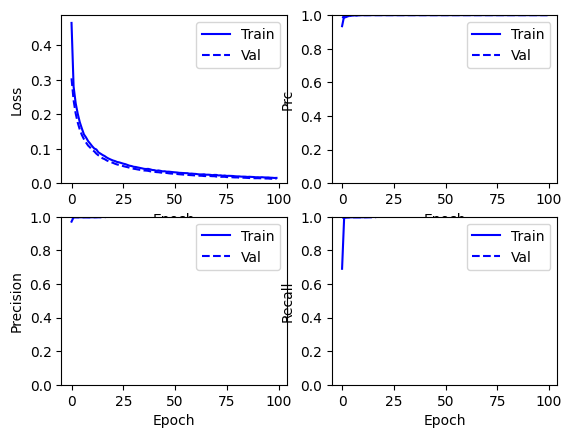

In [23]:
#plot training history

def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  colors=['b', 'g']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

plot_metrics(history)

8/8 [==============================] - 0s 3ms/step
loss :  0.012517034076154232
cross entropy :  0.002239406108856201
Brier score :  2.981894553499842e-08
tp :  600.0
fp :  0.0
tn :  1200.0
fn :  0.0
accuracy :  1.0
precision :  1.0
recall :  1.0
auc :  1.0
prc :  1.0

Legitimate Transactions Detected (True Negatives):  73
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  83
Total Fraudulent Transactions:  83
Classification report : 
               precision    recall  f1-score   support

      Cotton       1.00      1.00      1.00        73
        Wool       1.00      1.00      1.00        83
   Polyester       1.00      1.00      1.00        84

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



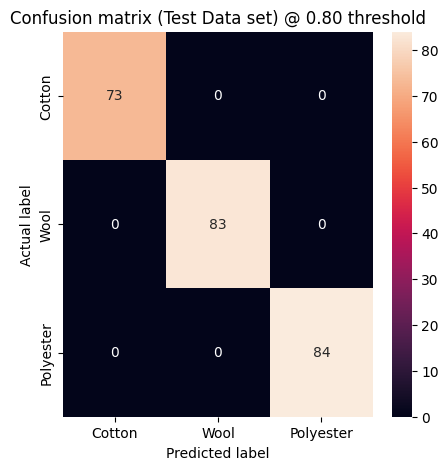

In [24]:
#confusion matrix


test_predictions_baseline = model.predict(x_test, batch_size=BATCH_SIZE)
class_names=['Cotton', 'Wool', 'Polyester']
threshold=0.8

def plot_cm(labels, predictions, class_names, threshold):
  predictions > threshold
  np.argmax(predictions, axis=1)
  predicted_label=np.argmax(predictions, axis=1)
  
  cm = confusion_matrix(labels,predicted_label ) #predictions > threshold
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalized cm
  
  plt.figure(figsize=(5,5))
  #sns.heatmap(cm, annot=True, fmt="d")
  #plt.subplot(2,1,1)
  #sns.heatmap(cmn, annot=True, fmt=".2f", xticklabels=class_names, yticklabels=class_names) 
 
  # plt.subplot(2,1,2)
  sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
  
  plt.title('Confusion matrix (Test Data set) @ {:.2f} threshold'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

  print('Classification report : \n',classification_report(y_test, predicted_label, target_names=class_names)) #true_label, predicted_label

baseline_results = model.evaluate(x_val, y_val_ohe,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline, class_names, threshold)



In [25]:
#np.shape(x_test)
x_test_arr=np.array(x_test)
np.shape(x_test_arr)
test_predictions_baseline1 = model.predict(x_test_arr[np.random.randint(len(x_test_arr))].reshape(1, -1))
print(test_predictions_baseline1)
aa=np.argmax(test_predictions_baseline1)
'''
# Define the server IP and port (use the Ubuntu machine's IP)
SERVER_IP = '192.168.1.20'
SERVER_PORT = 12345

# Create a socket object
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect to the server
client_socket.connect((SERVER_IP, SERVER_PORT))

# Send the detection label to the server
client_socket.send(str(aa).encode('utf-8'))
print(f"Sent label: {aa}")

# Close the connection
client_socket.close()
'''

1/1 [==============================] - 0s 183ms/step
[[9.9998939e-01 5.0955719e-06 5.4782427e-06]]


'\n# Define the server IP and port (use the Ubuntu machine\'s IP)\nSERVER_IP = \'192.168.1.20\'\nSERVER_PORT = 12345\n\n# Create a socket object\nclient_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)\n\n# Connect to the server\nclient_socket.connect((SERVER_IP, SERVER_PORT))\n\n# Send the detection label to the server\nclient_socket.send(str(aa).encode(\'utf-8\'))\nprint(f"Sent label: {aa}")\n\n# Close the connection\nclient_socket.close()\n'